# Relationship Btw Changes in the Dollar Exchange Rate and Energy Fee

*******************************

In [659]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy as sc
from scipy.stats import norm

import statsmodels.formula.api as sm
from sklearn import linear_model
plt.rcParams['figure.figsize'] = (10, 6)

Energy price source : https://data.tuik.gov.tr/Bulten/Index?p=Consumer-Price-Index-April-2023-49653                                                   
Dollar-TL history source : https://tr.investing.com/currencies/usd-try-historical-data

# Data Clean Part

In [660]:
df = pd.read_excel('consumer.xls')
df = df.T
df = df[123:] # We want to show 2013 to 2023 datas 
df.index = range(len(df))
df

,0,1,2,3,4,5,6,7,8,9,10
0,NaN,TL,2013,Ocak,January,0.357,1.0574,395.6659,4.6925,2.6255,4.2301
1,NaN,TL,2013,Şubat,February,0.357,1.0573,395.6789,4.858,2.62,4.2972
2,NaN,TL,2013,Mart,March,0.357,1.0578,395.8292,4.771,2.617,4.2769
3,NaN,TL,2013,Nisan,April,0.3587,1.0585,395.8224,4.6449,2.518,4.1582
4,NaN,TL,2013,Mayıs,May,0.3588,1.0592,395.8322,4.6416,2.4009,4.1535
...,...,...,...,...,...,...,...,...,...,...,...
119,NaN,TL,2022,Aralık,December,1.8455,6.0515,1377.3506,18.7984,10.2782,22.2562
120,NaN,TL,2023,Ocak,January,1.8459,5.6313,2539.413,20.3082,10.332,22.9381
121,NaN,TL,2023,Şubat,February,1.8459,5.6406,2539.413,20.9698,11.5277,21.481
122,NaN,TL,2023,Mart,March,1.8459,5.7837,2539.4171,20.9145,11.5853,21.2818


In [661]:
dolar = pd.read_csv('USD.csv')
dolar

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,01.04.2023,"19,4530","19,1863","19,7168","19,1750",NaN,"1,43%"
1,01.03.2023,"19,1793","18,8872","19,4223","18,6888",NaN,"1,54%"
2,01.02.2023,"18,8875","18,8100","19,3037","18,7590",NaN,"0,40%"
3,01.01.2023,"18,8115","18,6986","18,8578","18,5281",NaN,"0,65%"
4,01.12.2022,"18,6905","18,5922","18,7970","18,4152",NaN,"0,42%"
...,...,...,...,...,...,...,...
119,01.05.2013,"1,8756","1,7918","1,8978","1,7848",NaN,"4,61%"
120,01.04.2013,"1,7930","1,8111","1,8170","1,7797",NaN,"-0,88%"
121,01.03.2013,"1,8090","1,7994","1,8281","1,7885",NaN,"0,58%"
122,01.02.2013,"1,7985","1,7575","1,8152","1,7426",NaN,"2,25%"


In [662]:
dolar = dolar[::-1]
dolar.index = range(len(dolar))
dolar

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,01.01.2013,"1,7589","1,7837","1,7926","1,7518",NaN,"-1,39%"
1,01.02.2013,"1,7985","1,7575","1,8152","1,7426",NaN,"2,25%"
2,01.03.2013,"1,8090","1,7994","1,8281","1,7885",NaN,"0,58%"
3,01.04.2013,"1,7930","1,8111","1,8170","1,7797",NaN,"-0,88%"
4,01.05.2013,"1,8756","1,7918","1,8978","1,7848",NaN,"4,61%"
...,...,...,...,...,...,...,...
119,01.12.2022,"18,6905","18,5922","18,7970","18,4152",NaN,"0,42%"
120,01.01.2023,"18,8115","18,6986","18,8578","18,5281",NaN,"0,65%"
121,01.02.2023,"18,8875","18,8100","19,3037","18,7590",NaN,"0,40%"
122,01.03.2023,"19,1793","18,8872","19,4223","18,6888",NaN,"1,54%"


In [663]:
df = df.rename(columns={0: 'A', 1: 'B', 2: 'C', 3: 'D' ,4: 'E', 5: 'Electricity_Fee', 6: 'Natural_Gas_Fee',
                       7: 'Natural-Gas-Subsc-Fee', 8: 'Petrol', 9: 'LPG', 10: 'Diesel'})
df

,A,B,C,D,E,Electricity_Fee,Natural_Gas_Fee,Natural-Gas-Subsc-Fee,Petrol,LPG,Diesel
0,NaN,TL,2013,Ocak,January,0.357,1.0574,395.6659,4.6925,2.6255,4.2301
1,NaN,TL,2013,Şubat,February,0.357,1.0573,395.6789,4.858,2.62,4.2972
2,NaN,TL,2013,Mart,March,0.357,1.0578,395.8292,4.771,2.617,4.2769
3,NaN,TL,2013,Nisan,April,0.3587,1.0585,395.8224,4.6449,2.518,4.1582
4,NaN,TL,2013,Mayıs,May,0.3588,1.0592,395.8322,4.6416,2.4009,4.1535
...,...,...,...,...,...,...,...,...,...,...,...
119,NaN,TL,2022,Aralık,December,1.8455,6.0515,1377.3506,18.7984,10.2782,22.2562
120,NaN,TL,2023,Ocak,January,1.8459,5.6313,2539.413,20.3082,10.332,22.9381
121,NaN,TL,2023,Şubat,February,1.8459,5.6406,2539.413,20.9698,11.5277,21.481
122,NaN,TL,2023,Mart,March,1.8459,5.7837,2539.4171,20.9145,11.5853,21.2818


In [664]:
df = df.drop(columns = ['A'])
df = df.drop(columns = ['B'])
df = df.drop(columns = ['Natural-Gas-Subsc-Fee'])
df

,C,D,E,Electricity_Fee,Natural_Gas_Fee,Petrol,LPG,Diesel
0,2013,Ocak,January,0.357,1.0574,4.6925,2.6255,4.2301
1,2013,Şubat,February,0.357,1.0573,4.858,2.62,4.2972
2,2013,Mart,March,0.357,1.0578,4.771,2.617,4.2769
3,2013,Nisan,April,0.3587,1.0585,4.6449,2.518,4.1582
4,2013,Mayıs,May,0.3588,1.0592,4.6416,2.4009,4.1535
...,...,...,...,...,...,...,...,...
119,2022,Aralık,December,1.8455,6.0515,18.7984,10.2782,22.2562
120,2023,Ocak,January,1.8459,5.6313,20.3082,10.332,22.9381
121,2023,Şubat,February,1.8459,5.6406,20.9698,11.5277,21.481
122,2023,Mart,March,1.8459,5.7837,20.9145,11.5853,21.2818


In [665]:
df['Date'] = df['C'].astype(str)+' ' +df['E']
df

,C,D,E,Electricity_Fee,Natural_Gas_Fee,Petrol,LPG,Diesel,Date
0,2013,Ocak,January,0.357,1.0574,4.6925,2.6255,4.2301,2013 January
1,2013,Şubat,February,0.357,1.0573,4.858,2.62,4.2972,2013 February
2,2013,Mart,March,0.357,1.0578,4.771,2.617,4.2769,2013 March
3,2013,Nisan,April,0.3587,1.0585,4.6449,2.518,4.1582,2013 April
4,2013,Mayıs,May,0.3588,1.0592,4.6416,2.4009,4.1535,2013 May
...,...,...,...,...,...,...,...,...,...
119,2022,Aralık,December,1.8455,6.0515,18.7984,10.2782,22.2562,2022 December
120,2023,Ocak,January,1.8459,5.6313,20.3082,10.332,22.9381,2023 January
121,2023,Şubat,February,1.8459,5.6406,20.9698,11.5277,21.481,2023 February
122,2023,Mart,March,1.8459,5.7837,20.9145,11.5853,21.2818,2023 March


In [666]:
df['C'] = df['Date']
df = df.drop(columns = ['E'])
df = df.drop(columns = ['D'])
df = df.drop(columns = ['Date'])
df = df.rename(columns={'C': 'Date'})
df

,Date,Electricity_Fee,Natural_Gas_Fee,Petrol,LPG,Diesel
0,2013 January,0.357,1.0574,4.6925,2.6255,4.2301
1,2013 February,0.357,1.0573,4.858,2.62,4.2972
2,2013 March,0.357,1.0578,4.771,2.617,4.2769
3,2013 April,0.3587,1.0585,4.6449,2.518,4.1582
4,2013 May,0.3588,1.0592,4.6416,2.4009,4.1535
...,...,...,...,...,...,...
119,2022 December,1.8455,6.0515,18.7984,10.2782,22.2562
120,2023 January,1.8459,5.6313,20.3082,10.332,22.9381
121,2023 February,1.8459,5.6406,20.9698,11.5277,21.481
122,2023 March,1.8459,5.7837,20.9145,11.5853,21.2818


In [667]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y %B')
df

,Date,Electricity_Fee,Natural_Gas_Fee,Petrol,LPG,Diesel
0,2013-01-01,0.357,1.0574,4.6925,2.6255,4.2301
1,2013-02-01,0.357,1.0573,4.858,2.62,4.2972
2,2013-03-01,0.357,1.0578,4.771,2.617,4.2769
3,2013-04-01,0.3587,1.0585,4.6449,2.518,4.1582
4,2013-05-01,0.3588,1.0592,4.6416,2.4009,4.1535
...,...,...,...,...,...,...
119,2022-12-01,1.8455,6.0515,18.7984,10.2782,22.2562
120,2023-01-01,1.8459,5.6313,20.3082,10.332,22.9381
121,2023-02-01,1.8459,5.6406,20.9698,11.5277,21.481
122,2023-03-01,1.8459,5.7837,20.9145,11.5853,21.2818


In [668]:
df['Dolar_TL'] = dolar['Şimdi']
df

,Date,Electricity_Fee,Natural_Gas_Fee,Petrol,LPG,Diesel,Dolar_TL
0,2013-01-01,0.357,1.0574,4.6925,2.6255,4.2301,"1,7589"
1,2013-02-01,0.357,1.0573,4.858,2.62,4.2972,"1,7985"
2,2013-03-01,0.357,1.0578,4.771,2.617,4.2769,"1,8090"
3,2013-04-01,0.3587,1.0585,4.6449,2.518,4.1582,"1,7930"
4,2013-05-01,0.3588,1.0592,4.6416,2.4009,4.1535,"1,8756"
...,...,...,...,...,...,...,...
119,2022-12-01,1.8455,6.0515,18.7984,10.2782,22.2562,"18,6905"
120,2023-01-01,1.8459,5.6313,20.3082,10.332,22.9381,"18,8115"
121,2023-02-01,1.8459,5.6406,20.9698,11.5277,21.481,"18,8875"
122,2023-03-01,1.8459,5.7837,20.9145,11.5853,21.2818,"19,1793"


### In datas, there are str or float data, so we change all of this to float for easy use

In [669]:
df['Electricity_Fee'] = df['Electricity_Fee'].astype(str).str.replace(',', '.').astype(float)
df['Dolar_TL'] = df['Dolar_TL'].astype(str).str.replace(',', '.').astype(float)
df['Natural_Gas_Fee'] = df['Natural_Gas_Fee'].astype(str).str.replace(',', '.').astype(float)
df['Petrol'] = df['Petrol'].astype(str).str.replace(',', '.').astype(float)
df['LPG'] = df['LPG'].astype(str).str.replace(',', '.').astype(float)
df['Diesel'] = df['Diesel'].astype(str).str.replace(',', '.').astype(float)

# Linear Regression Analysis

Text(0, 0.5, 'Energy Types Prices')

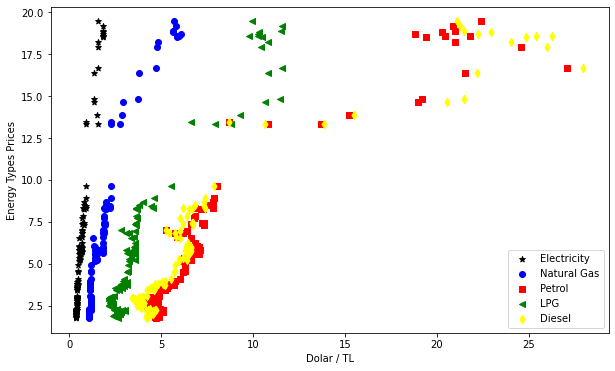

In [670]:
plt.scatter(x=df['Electricity_Fee'],y=df['Dolar_TL'],c='k',marker='*',label='Electricity')
plt.scatter(x=df['Natural_Gas_Fee'],y=df['Dolar_TL'],c='b',marker='o',label='Natural Gas')
plt.scatter(x=df['Petrol'],y=df['Dolar_TL'],c='r',marker='s',label='Petrol')
plt.scatter(x=df['LPG'],y=df['Dolar_TL'],c='green',marker='<',label='LPG')
plt.scatter(x=df['Diesel'],y=df['Dolar_TL'],c='yellow',marker='d',label='Diesel')

plt.legend(loc=4)
plt.xlabel('Dolar / TL')
plt.ylabel('Energy Types Prices')

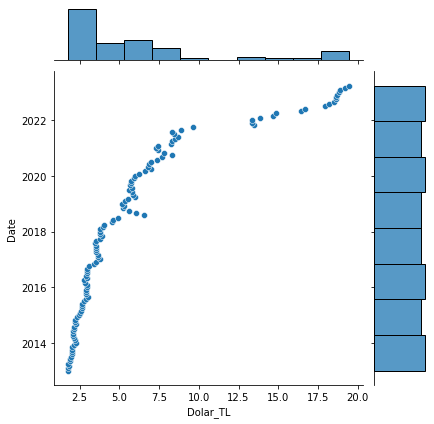

In [671]:
sns.jointplot(x='Dolar_TL',y='Date',data=df)

In [672]:
df.describe()

,Electricity_Fee,Natural_Gas_Fee,Petrol,LPG,Diesel,Dolar_TL
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,0.658055,1.822540,7.620653,4.004302,7.421681,6.139290
std,0.416231,1.274767,5.186025,2.650831,6.029103,4.930414
min,0.357000,1.057300,4.128800,2.133000,3.433200,1.758900
25%,0.390700,1.128375,4.845800,2.558675,4.296800,2.789375
50%,0.448200,1.195550,5.678800,3.056350,5.201650,3.937100
75%,0.720425,1.871500,7.059250,3.610825,6.579850,7.369275
max,1.845900,6.051500,27.082100,11.587700,27.977200,19.453000


********
df DataFrame's heatmap

                 Electricity_Fee  Natural_Gas_Fee    Petrol       LPG  \
Electricity_Fee         1.000000         0.969262  0.939603  0.952320   
Natural_Gas_Fee         0.969262         1.000000  0.943602  0.928672   
Petrol                  0.939603         0.943602  1.000000  0.977050   
LPG                     0.952320         0.928672  0.977050  1.000000   
Diesel                  0.945154         0.953948  0.992527  0.973723   
Dolar_TL                0.979840         0.951727  0.943063  0.956976   

                   Diesel  Dolar_TL  
Electricity_Fee  0.945154  0.979840  
Natural_Gas_Fee  0.953948  0.951727  
Petrol           0.992527  0.943063  
LPG              0.973723  0.956976  
Diesel           1.000000  0.940519  
Dolar_TL         0.940519  1.000000  


<AxesSubplot:>

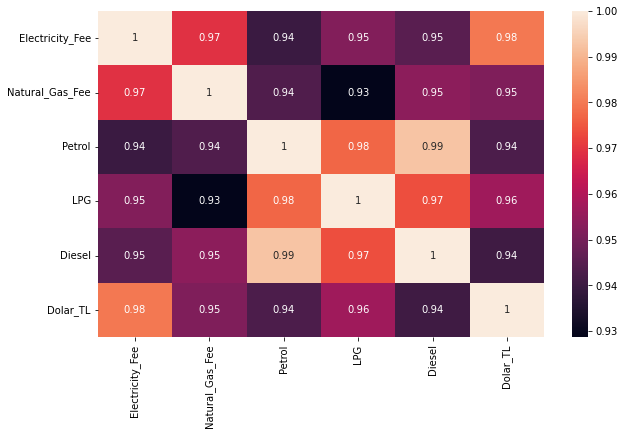

In [673]:
print(df.corr())
sns.heatmap(df.corr(), annot=True)

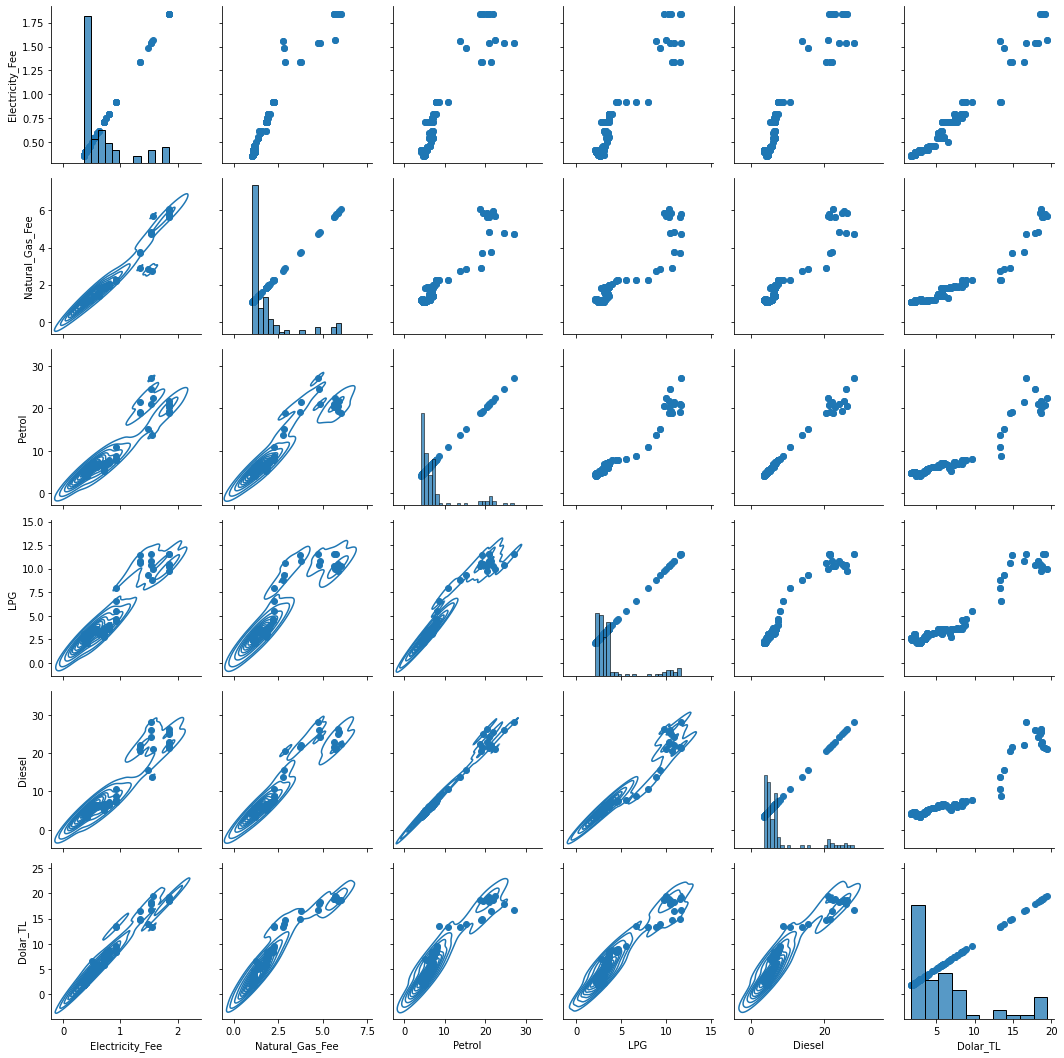

In [674]:
ir = sns.PairGrid(df)   
ir.map(plt.scatter)
ir.map_diag(sns.histplot)
ir.map_upper(plt.scatter)
ir.map_lower(sns.kdeplot)

In [675]:
dolar = sm.ols(formula="Dolar_TL ~ Electricity_Fee", data=df).fit()
dolar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Dolar_TL   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     2935.
Date:                Wed, 10 May 2023   Prob (F-statistic):           3.43e-87
Time:                        16:18:49   Log-Likelihood:                -173.57
No. Observations:                 124   AIC:                             351.1
Df Residuals:                     122   BIC:                             356.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.4985      0.167     -8.993      0.000      -1.828      -1.169
Electricity_Fee    11.6066      0.214     54.172      0.000      11.182      12.031
==============================================================================
Omnibus:                       48.631   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.878
Skew:                           1.353   Prob(JB):                     8.71e-40
Kurtosis:                       8.243   Cond. No.                         3.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Dolar ~ Electricity Fee')

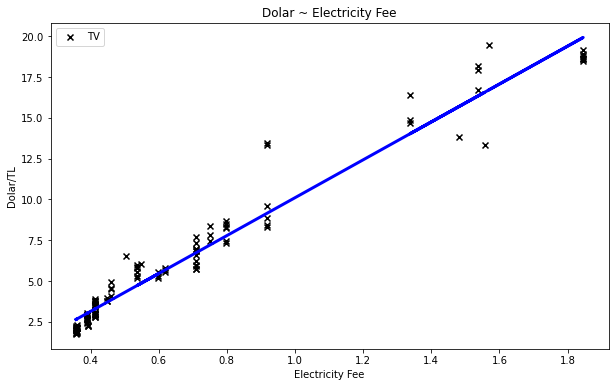

In [676]:
plt.scatter(x=df['Electricity_Fee'],y=df['Dolar_TL'],c='black',marker='x',label='TV')
plt.plot(df['Electricity_Fee'],dolar.predict(),color='b',linewidth=3)

plt.legend(loc=2)
plt.xlabel('Electricity Fee')
plt.ylabel('Dolar/TL')
plt.title('Dolar ~ Electricity Fee')

#### Dolar ~ Electricity Fee's R-squared is more than 0.96 and p-value (0) its seems like okey.

****************

In [677]:
Gas = sm.ols(formula="Dolar_TL ~ Natural_Gas_Fee", data=df).fit()
Gas.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Dolar_TL   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     1173.
Date:                Wed, 10 May 2023   Prob (F-statistic):           2.00e-64
Time:                        16:18:49   Log-Likelihood:                -226.82
No. Observations:                 124   AIC:                             457.6
Df Residuals:                     122   BIC:                             463.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.5695      0.239     -2.385      0.019      -1.042      -0.097
Natural_Gas_Fee     3.6810      0.107     34.248      0.000       3.468       3.894
==============================================================================
Omnibus:                       33.555   Durbin-Watson:                   0.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.629
Skew:                           1.209   Prob(JB):                     1.13e-13
Kurtosis:                       5.387   Cond. No.                         4.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Dolar ~ Natural Gas Fee')

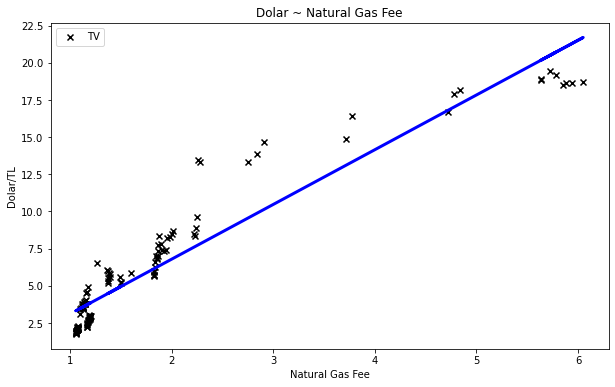

In [678]:
plt.scatter(x=df['Natural_Gas_Fee'],y=df['Dolar_TL'],c='black',marker='x',label='TV')
plt.plot(df['Natural_Gas_Fee'],Gas.predict(),color='b',linewidth=3,)

plt.legend(loc=2)
plt.xlabel('Natural Gas Fee')
plt.ylabel('Dolar/TL')
plt.title('Dolar ~ Natural Gas Fee')

#### Dolar ~ Natural Gas Fee's R-squared is more than 0.9 and p-value (0) its seems like okey.

****************

In [679]:
petrol = sm.ols(formula="Dolar_TL ~ Petrol", data=df).fit()
petrol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Dolar_TL   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     980.8
Date:                Wed, 10 May 2023   Prob (F-statistic):           3.63e-60
Time:                        16:18:50   Log-Likelihood:                -236.78
No. Observations:                 124   AIC:                             477.6
Df Residuals:                     122   BIC:                             483.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6932      0.264     -2.630      0.010      -1.215      -0.171
Petrol         0.8966      0.029     31.317      0.000       0.840       0.953
==============================================================================
Omnibus:                       15.459   Durbin-Watson:                   0.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.075
Skew:                           0.257   Prob(JB):                     2.21e-11
Kurtosis:                       6.039   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Dolar ~ Petrol Fee')

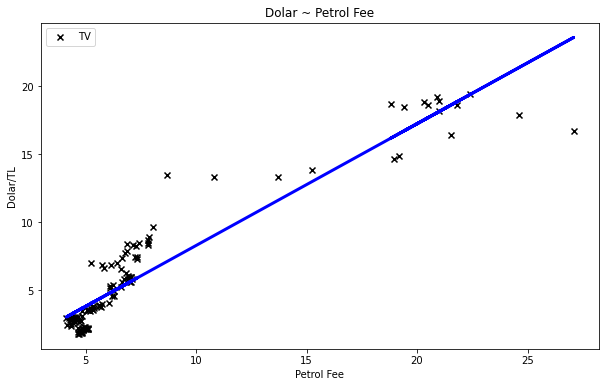

In [680]:
plt.scatter(x=df['Petrol'],y=df['Dolar_TL'],c='black',marker='x',label='TV')
plt.plot(df['Petrol'],petrol.predict(),color='b',linewidth=3)

plt.legend(loc=2)
plt.xlabel('Petrol Fee')
plt.ylabel('Dolar/TL')
plt.title('Dolar ~ Petrol Fee')

#### When we look the graph there are some outline. So we can use polynomial regression and graph.

*****************

In [681]:
Petrol2 = sm.ols(formula="Dolar_TL ~ Petrol + I(Petrol ** 2.0)", data=df).fit()
par3 = dict(Petrol2.params)
x1 = np.linspace(0,30,30)
y3 = par3["Intercept"] + par3['Petrol']*x1 + par3['I(Petrol ** 2.0)']*x1**2
Petrol2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Dolar_TL   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1187.
Date:                Wed, 10 May 2023   Prob (F-statistic):           3.09e-80
Time:                        16:18:50   Log-Likelihood:                -185.66
No. Observations:                 124   AIC:                             377.3
Df Residuals:                     121   BIC:                             385.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.0815      0.542    -13.060      0.000      -8.155      -6.008
Petrol               2.3369      0.117     19.931      0.000       2.105       2.569
I(Petrol ** 2.0)    -0.0541      0.004    -12.449      0.000      -0.063      -0.046
==============================================================================
Omnibus:                       13.480   Durbin-Watson:                   0.363
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.534
Skew:                           0.493   Prob(JB):                     1.28e-05
Kurtosis:                       4.841   Cond. No.                         920.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

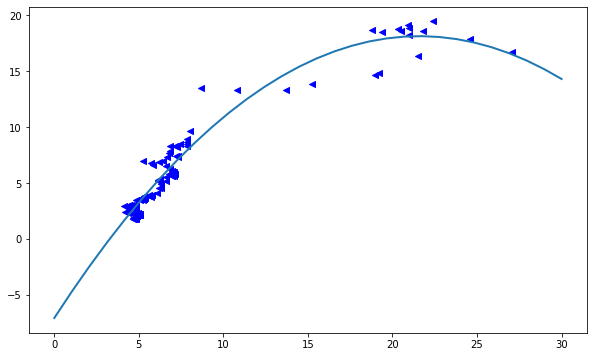

In [682]:
plt.scatter(df['Petrol'],df['Dolar_TL'],color='b',label="data",marker='<')
plt.plot(x1,y3,label="degree 3",linewidth=2)

#### When we use second polynom, graph and R-squared more suitable.

**************

In [683]:
LPG = sm.ols(formula="Dolar_TL ~ LPG", data=df).fit()
LPG.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Dolar_TL   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1327.
Date:                Wed, 10 May 2023   Prob (F-statistic):           2.09e-67
Time:                        16:18:50   Log-Likelihood:                -219.85
No. Observations:                 124   AIC:                             443.7
Df Residuals:                     122   BIC:                             449.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9881      0.234     -4.216      0.000      -1.452      -0.524
LPG            1.7799      0.049     36.428      0.000       1.683       1.877
==============================================================================
Omnibus:                        0.200   Durbin-Watson:                   0.271
Prob(Omnibus):                  0.905   Jarque-Bera (JB):                0.022
Skew:                          -0.004   Prob(JB):                        0.989
Kurtosis:                       3.064   Cond. No.                         8.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Dolar ~ LPG Fee')

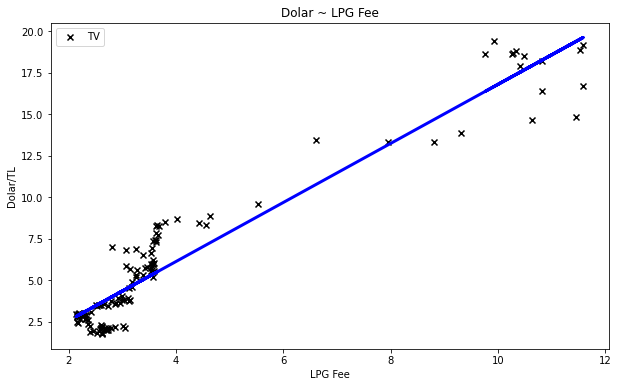

In [684]:
plt.scatter(x=df['LPG'],y=df['Dolar_TL'],c='black',marker='x',label='TV')
plt.plot(df['LPG'],LPG.predict(),color='b',linewidth=3)

plt.legend(loc=2)
plt.xlabel('LPG Fee')
plt.ylabel('Dolar/TL')
plt.title('Dolar ~ LPG Fee')

In [685]:
Diesel = sm.ols(formula="Dolar_TL ~ Diesel", data=df).fit()
Diesel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Dolar_TL   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     935.0
Date:                Wed, 10 May 2023   Prob (F-statistic):           4.83e-59
Time:                        16:18:50   Log-Likelihood:                -239.41
No. Observations:                 124   AIC:                             482.8
Df Residuals:                     122   BIC:                             488.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4311      0.240      1.795      0.075      -0.044       0.906
Diesel         0.7691      0.025     30.577      0.000       0.719       0.819
==============================================================================
Omnibus:                       15.130   Durbin-Watson:                   0.224
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.990
Skew:                           0.697   Prob(JB):                     7.52e-05
Kurtosis:                       4.315   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Dolar ~ Diesel Fee')

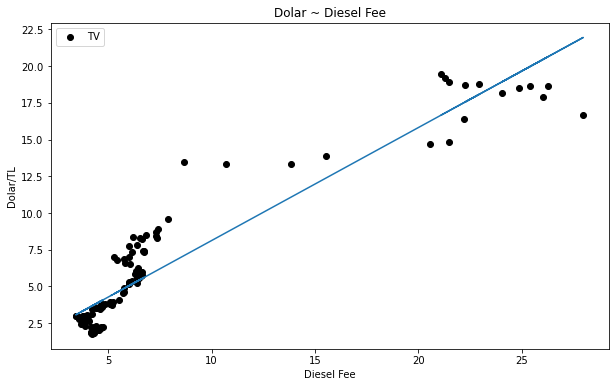

In [686]:
plt.scatter(x=df['Diesel'],y=df['Dolar_TL'],c='black',marker='o',label='TV')
plt.plot(df['Diesel'],Diesel.predict())

plt.legend(loc=2)
plt.xlabel('Diesel Fee')
plt.ylabel('Dolar/TL')
plt.title('Dolar ~ Diesel Fee')

#### We can talk about a linear relationship between Dollar and Diesel prices by looking at the R-squared (0.885) and p-value. But it might be better to set up a Polynomial regression rather than a Linear formula.

In [687]:
diesel2 = sm.ols(formula="Dolar_TL ~ Diesel + I(Diesel ** 2.0)", data=df).fit()
par2 = dict(diesel2.params)
x = np.linspace(0,30,30)
y2 = par2["Intercept"] + par2['Diesel']*x + par2['I(Diesel ** 2.0)']*x**2
diesel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Dolar_TL   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1106.
Date:                Wed, 10 May 2023   Prob (F-statistic):           1.78e-78
Time:                        16:18:50   Log-Likelihood:                -189.81
No. Observations:                 124   AIC:                             385.6
Df Residuals:                     121   BIC:                             394.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.9144      0.468    -10.506      0.000      -5.841      -3.988
Diesel               2.0465      0.106     19.260      0.000       1.836       2.257
I(Diesel ** 2.0)    -0.0454      0.004    -12.177      0.000      -0.053      -0.038
==============================================================================
Omnibus:                        4.174   Durbin-Watson:                   0.295
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                4.728
Skew:                           0.157   Prob(JB):                       0.0940
Kurtosis:                       3.904   Cond. No.                         915.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

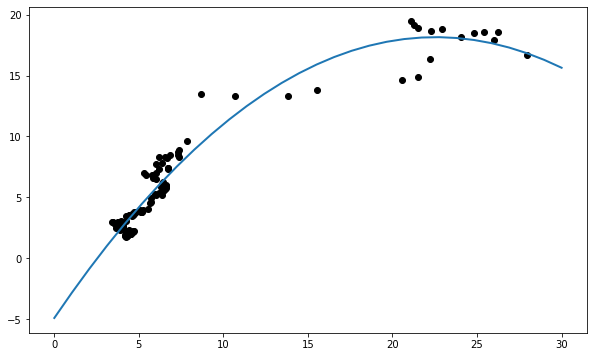

In [688]:
plt.scatter(df['Diesel'],df['Dolar_TL'],color='black',label="data")
plt.plot(x,y2,label="degree 2",linewidth=2)

#### Applying the polynomial regression between Dollar and Diesel prices became R-squared (0.948) and the p-value is still 0 so forecasting with this model will be much better.

**********

### train-test set create

In [689]:
df = df.drop(['Date'], axis=1)

In [690]:
df.head()
df.tail()

,Electricity_Fee,Natural_Gas_Fee,Petrol,LPG,Diesel,Dolar_TL
119,1.8455,6.0515,18.7984,10.2782,22.2562,18.6905
120,1.8459,5.6313,20.3082,10.3320,22.9381,18.8115
121,1.8459,5.6406,20.9698,11.5277,21.4810,18.8875
122,1.8459,5.7837,20.9145,11.5853,21.2818,19.1793
123,1.5690,5.7201,22.4125,9.9309,21.1161,19.4530


In [691]:
X = df.drop(['Dolar_TL'],axis=1)
y = df['Dolar_TL']

In [692]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [693]:
X_train.shape

(99, 5)

In [694]:
y_train.shape

(99,)

In [695]:
X_test.shape

(25, 5)

In [696]:
y_test.shape

(25,)

********************

# Model 1 - K-Nearest Neighbors (kNN)

In [697]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

### Create Model

In [698]:
knn_model = KNeighborsRegressor() # n_neighbor is default 5 

In [699]:
model = knn_model.fit(X_train, y_train)

In [700]:
model.n_neighbors

5

### Prediction Part

In [701]:
new_data = [[1.8459],[5.7837],[20.9145],[11.5853],[21.2818]]
new_data = pd.DataFrame(new_data).T


In [702]:
model.predict(new_data)

C:\Users\enesl\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([17.64204])

we give new_data DataFrame values to model and model predict Dolar-TL (17.64204) value.
********

In [703]:
y_pred = model.predict(X_test)

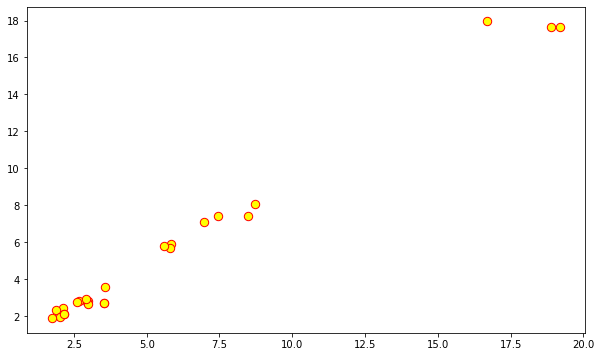

In [704]:
plt.scatter(y_test, model.predict(X_test), color='yellow', edgecolors='r' ,s=70)

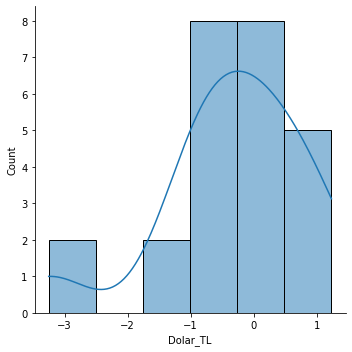

In [705]:
sns.displot((y_test - linear_pred),kde=True)

In [706]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.59688709840304

In [707]:
x_pred = model.predict(X_train)

In [708]:
np.sqrt(mean_squared_error(y_train ,x_pred))

0.6609695300118155

test error : 0.59688709840304

train error :  0.6609695300118155

these values is not close each other so we should find optimal n_neighbors value
*********

In [709]:
knn_values = {'n_neighbors' : np.arange(1,30,1)}

In [710]:
knn = KNeighborsRegressor()

In [711]:
knn_cross_val_model = GridSearchCV(knn, knn_values, cv = 10)

In [712]:
knn_cross_val_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [713]:
knn_cross_val_model.best_params_['n_neighbors']

2

In here we try 1-30 k-value and we use GridSearchCV to use cross-validation. Lastly we fit the model and model gives us optimal k value (2) 
***********

In [714]:
knn_model2 = KNeighborsRegressor(n_neighbors=2)
model2 = knn_model2.fit(X_train, y_train)

In [715]:
y_pred = model.predict(X_test)

In [716]:
new_df = pd.DataFrame({'y_test': y_test,
                      'predicts': y_pred})


In [717]:
new_df['diff'] = new_df['predicts'] - new_df['y_test']
new_df[:10]

,y_test,predicts,diff
18,2.1418,2.42678,0.28498
42,2.9883,2.84140,-0.14690
36,2.9553,2.78840,-0.16690
76,5.8382,5.90724,0.06904
53,3.5212,2.70814,-0.81306
90,6.9719,7.09628,0.12438
56,3.5637,3.61202,0.04832
122,19.1793,17.64204,-1.53726
121,18.8875,17.64204,-1.24546
4,1.8756,2.33966,0.46406


In [718]:
np.sqrt(mean_squared_error(y_train, knn_model2.predict(X_train)))

0.3426914145865244

In [719]:
np.sqrt(-1 * cross_val_score(knn_model2, X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

0.5861764505278755

Validate train error : 0.5861764505278755
   ********************

# Model 2 - Linear Regression

In [720]:
from sklearn.linear_model import LinearRegression

In [721]:
l_m = LinearRegression()

In [722]:
l_m.fit(X_train,y_train)

LinearRegression()

In [723]:
print(l_m.intercept_)

-2.4791361407038224


In [724]:
l_m.coef_

array([ 6.2160344 ,  1.13939859,  0.49719868,  0.86797386, -0.63938543])

In [725]:
cdf = pd.DataFrame(l_m.coef_, X.columns, columns=['Coeff'])

In [726]:
cdf

,Coeff
Electricity_Fee,6.216034
Natural_Gas_Fee,1.139399
Petrol,0.497199
LPG,0.867974
Diesel,-0.639385


### Prediction Part

In [727]:
linear_pred = l_m.predict(X_test)

In [734]:
l_m.predict(new_data)

C:\Users\enesl\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22.43210787])

#### When we give new_data to kNN. It return to us 17.64204. Linear Regression predict not like realistic.

*************************

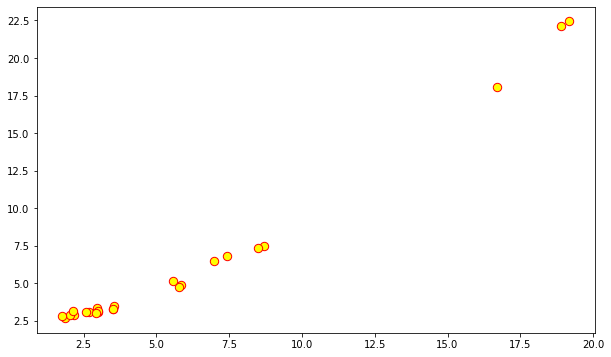

In [729]:
plt.scatter(y_test, linear_pred, color='yellow', edgecolors='r', s=70)

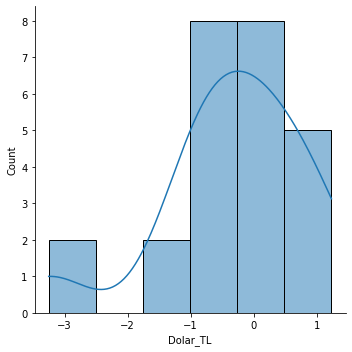

In [730]:
sns.displot((y_test - linear_pred),kde=True)

In [731]:
lin_df = pd.DataFrame({'y_test': y_test,
                      'predicts': linear_pred})
lin_df['diff'] = lin_df['y_test'] - lin_df['predicts']

In [732]:
lin_df[:10]

,y_test,predicts,diff
18,2.1418,2.996823,-0.855023
42,2.9883,3.103227,-0.114927
36,2.9553,3.327245,-0.371945
76,5.8382,4.868290,0.969910
53,3.5212,3.276759,0.244441
90,6.9719,6.495366,0.476534
56,3.5637,3.489665,0.074035
122,19.1793,22.432108,-3.252808
121,18.8875,22.119194,-3.231694
4,1.8756,2.694056,-0.818456


In [733]:
np.sqrt(-1 * cross_val_score(l_m, X_train, y_train, cv=10, scoring='neg_mean_squared_error')).mean()

0.9420431236547229

Validate train error : 0.9420431236547229
   ********************

### kNN and Linear Regression prediction result: 

If we compare kNN validation train error and Linear Regression validation train error:                                      
    *Linear Regression validation train error: 0.9420431236547229                                        
    *kNN validation train error: 0.5861764505278755
    
    so kNN validate train error is less than Linear Regression validate train error

# Conclusion

In our Energy Fee Prices (2013-2023) Project, Firstly we start with Data Searching. Than we take Energy Fee changes dataset from TUIK. Than we take Dollar exchange rate (2013-2023) from inventing.com. After that TUIK's we decided TUIK's data not clear than we clear data in Data Clean Section. In second part we merge Energy Fee data with Dollar data than we did regression analysis. Than we use kNN and Linear Regression for prediction. Lastly, we compare train error each other.